# <center>Geometric Brownian Motion</center>

Geometric Brownian motion is a stochastic process that can be used to generate sample paths that the underlying equity may follow. In other words, we can use geometric Brownian motion to simulate stock prices.

$$\frac{dS_t}{S_t}=\mu d_t + \sigma dW_t$$
$$S_t=S_0\exp{((\mu-\frac{1}{2}\sigma^2)t+\sigma W_t)}$$
$S_t : \text{stock price at time t}$  
$\sigma : \text{volatility term}$  
$\mu : \text{drift term}$  
$W_t: \text{standard brownian motion}$

The first term is a "drift" and the second term is a "shock." For each time period, our model assumes the price will "drift" up by the expected return. But the drift will be shocked (added or subtracted) by a random shock.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

#Data recovery and conversion
def Openfile(file):
    f=open(file,'r')
    l=[]
    for line in f:
        currentline=line.split()
        l.append([currentline[0],float(currentline[1].replace(',','.'))])
    f.close()
    return l
    
def GBM_simulation(S_0,mu,std,dt,nSteps,nSim):
    St=np.exp((mu-std**2 / 2)*dt+std*np.random.normal(0,np.sqrt(dt),size=(nSim,nSteps)).T)
    St=np.vstack([np.ones(nSim),St]) #concatenation
    return S_0*St.cumprod(axis=0)


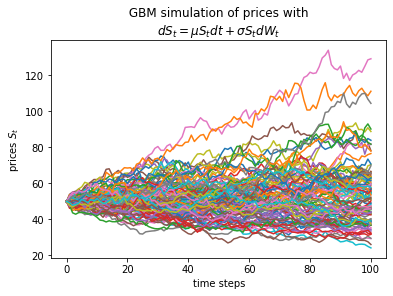

In [14]:
#Main
#I) Geometric Brownian Motion parameters
mu = 0.1 #drift term
std = 0.3  #volatility
S_0 = 50  #last price (closing stock price)
nSim = 100  #number of simulations 
nSteps=100 # number of time steps
T=1  #time horizon (years) 
dt=T/nSteps

SimS = GBM_simulation(S_0,mu,std,dt,nSteps,nSim) #random price simulation at one day horizon (Geometric Brownian Motion)

#Plot
plt.plot(SimS)
plt.ylabel("prices $S_t$")
plt.xlabel('time steps')
plt.title(' GBM simulation of prices with \n$dS_t=µS_tdt+σS_tdW_t$')
plt.show()